## <font color='purple'> About the Data: </font>

A Business consulting start-up intends analyzing the marketing effort for the previous quarter. 

This will help:
- with an understanding of the correlation between marketing costs and sales generation. 
- the tech start-up allocate its marketing budget more resourcefully
- identify which marketing channel is the least or most effective
- generate coefficient values that can be used to predict generated sales from each of the marketing efforts.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Ad_data = pd. read_csv(r'./Advertising.csv')

In [78]:
Ad_data.head()

,Instagram,Youtube,Podcasts,generated_sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Define my X(feature) and y(label) varables.**

In [79]:
# Ad_data['total_Ad'] = Ad_data['Instagram'] + Ad_data['Youtube']+Ad_data['Podcasts']

In [80]:
Ad_data

,Instagram,Youtube,Podcasts,generated_sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [81]:
X = Ad_data.drop('generated_sales', axis=1)
X

,Instagram,Youtube,Podcasts
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [82]:
y = Ad_data['generated_sales']

y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: generated_sales, Length: 200, dtype: float64

**Split the data into our train and test set.**

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101)

In [85]:
Ad_data

,Instagram,Youtube,Podcasts,generated_sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [86]:
len(X_train)

# This makes up 70% of the data

140

In [87]:
len(X_test)
# This makes up 30% of the data

60

**Import model**

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
model = LinearRegression()

We would only be fitting in our training dataset into the model, and then use the y set to check our well oir data is able to predict accurately

In [90]:
model.fit(X_train, y_train)

LinearRegression()

**Test the model to predict**

In [188]:
test_predictions = model.predict(X_test)

test_predictions 

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [100]:
X_test.head(5)

# The test data represents data our model has not seen. So, we check the first 5 test independent indexes of our test dataset

,Instagram,Youtube,Podcasts
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [101]:
y_test.head(5)

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: generated_sales, dtype: float64

**Check the performance of our Model**

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [95]:
Ad_data['generated_sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='generated_sales', ylabel='Count'>

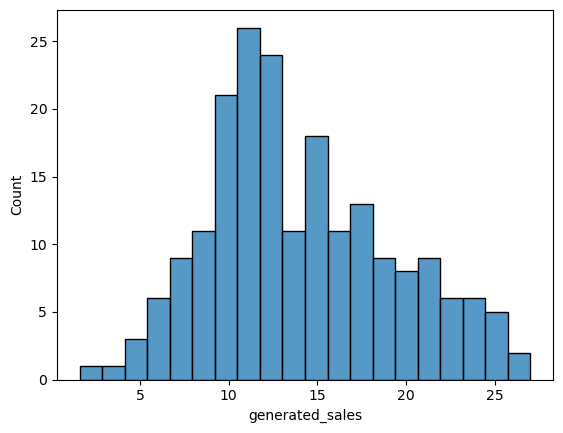

In [96]:
sns.histplot(data=Ad_data,x='generated_sales', bins=20)

In [102]:
mean_absolute_error(y_test, test_predictions)

# This is an ideal low MAE- which indicates the variance between our predicted value and the real value is low

1.213745773614481

In [103]:
np.sqrt(mean_squared_error(y_test, test_predictions))

# This is an ideal low RMSE- which indicates the variance between our predicted value and the real value is low

1.516151937599388

**Residual Plot**

In [107]:
residuals = y_test - test_predictions

# The lower the residual, the higher the confidence in our model. An ideal residual value is 0

In [106]:
residuals

# the residuals below arethose values with -1

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: generated_sales, dtype: float64

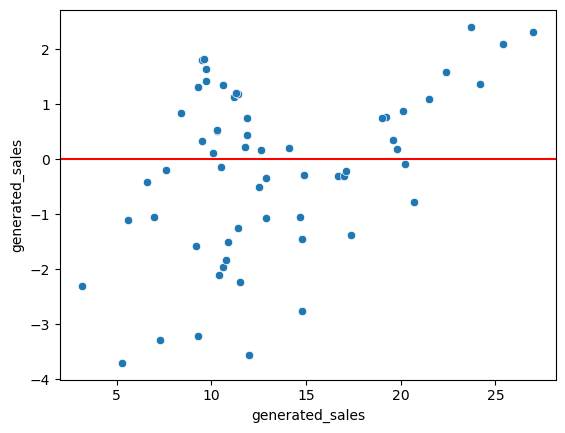

In [193]:
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red');

**From the above**:

- The datapoints are heteroskedaticity (well-disperesed around the 0 line)
- This indicates no pattern or trend in the resideuals (the variance between the y_test and the test_predictions)
- If there was a homoskedaticity, we would then have to review the dataset or the model used for the dataset.


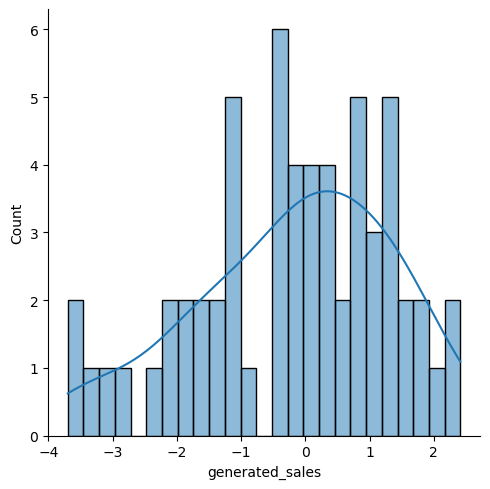

In [196]:
sns.displot(residuals, bins = 25, kde=True);

**From the above**:

- Our data is well skewed around 0. Indicates our model is quite reliable

**To deploy the model**

In [197]:
final_model = LinearRegression()

In [198]:
final_model.fit(X, y)

LinearRegression()

In [200]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [201]:
y_pred = final_model.predict(X)

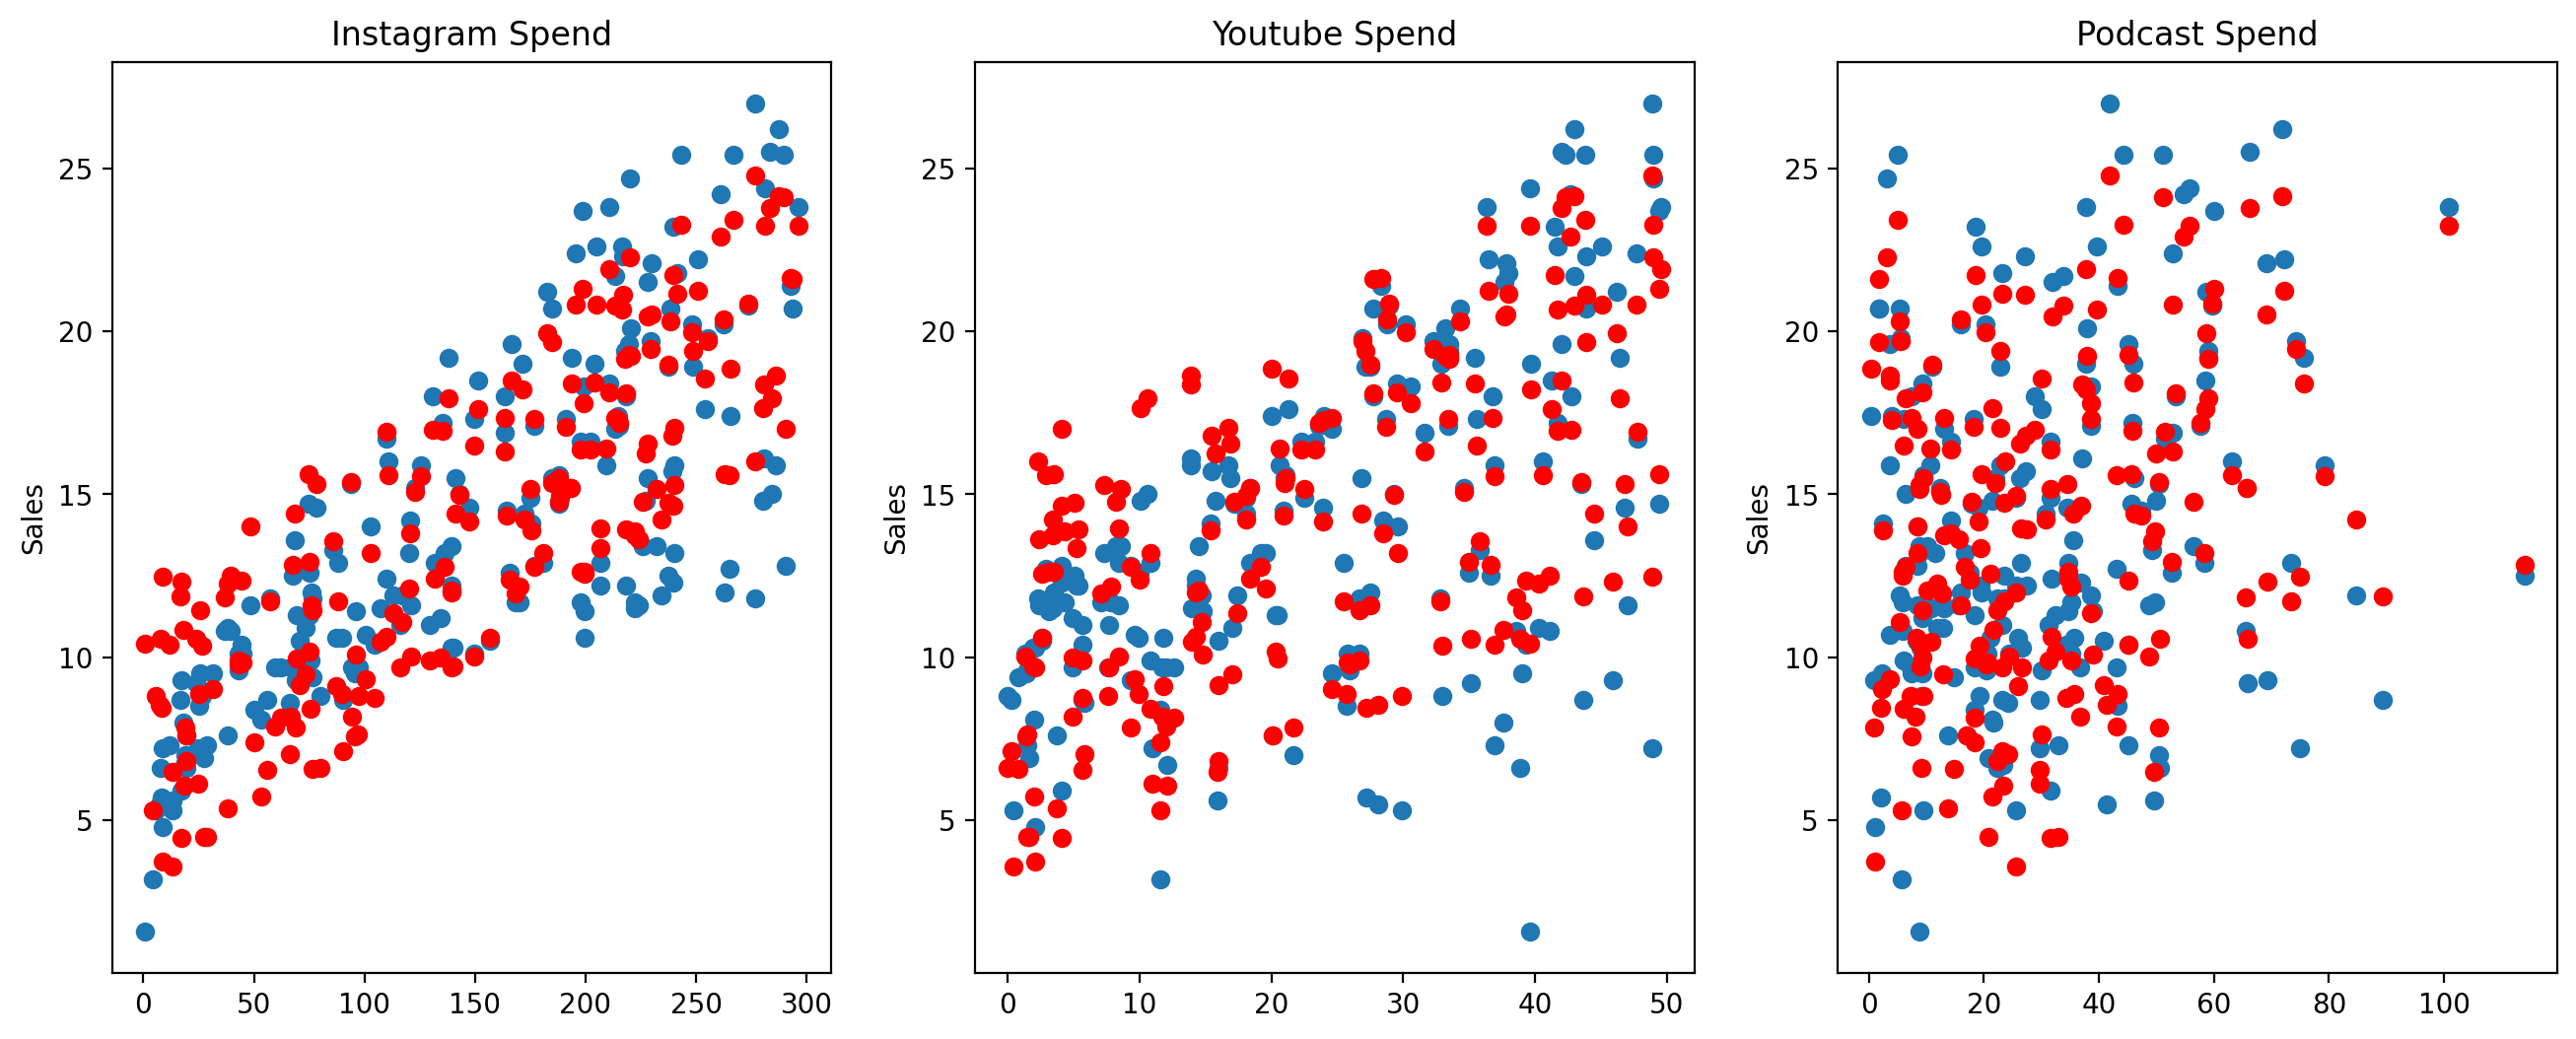

In [222]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6),dpi=200)

axes[0].plot(Ad_data['Instagram'], Ad_data['generated_sales'], 'o')
axes[0].plot(Ad_data['Instagram'], y_pred, 'o', color='red')
axes[0].set_ylabel('Sales')
axes[0].set_title('Instagram Spend')

axes[1].plot(Ad_data['Youtube'], Ad_data['generated_sales'], 'o')
axes[1].plot(Ad_data['Youtube'], y_pred, 'o', color='red')
axes[1].set_ylabel('Sales')
axes[1].set_title('Youtube Spend')

axes[2].plot(Ad_data['Podcasts'], Ad_data['generated_sales'], 'o')
axes[2].plot(Ad_data['Podcasts'], y_pred, 'o', color='red')
axes[2].set_ylabel('Sales')
axes[2].set_title('Podcast Spend')

plt.show()

**From the above**:

- The graph shows our predictions (in red) are close with the true values (in blue)
- Instagram Ads have a positive relationship with sales
- Youtube also has a positive relationship woth sales
- There is no relationship between newspaper and sales

**Model Deployment/Save**

In [224]:
from joblib import dump,load

In [226]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [227]:
loaded_model = load('final_sales_model.joblib')

In [228]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

**Applying our model to a marketing business case**

With an Ad budget of 220 on Instagram, 180 on Youtube and 100 on Podcast; predict the sales value

In [237]:
campaign = [[220, 180, 100]]

# The shape of the campaign has to match the sahe of the Ad_data

In [238]:
X.shape

(200, 3)

In [239]:
loaded_model.predict(campaign)

C:\Users\Teni\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([46.83876511])

To sum it up, by using the calculated coefficients, the startup can predict its sales and see how each marketing effort affects sales. Interestingly, it appears that Podcasts have the smallest impact on sales.